# Лабораторная работа 2

## Полносвязная нейронная сеть
---

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

---

*Подготовка данных*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import pandas as pd

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

---

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

---

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети
---

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

---

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss
---

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12).

---

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Обратный проход
---

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 

---

In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных
---

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.

---

Final training loss:  0.017143643532923816


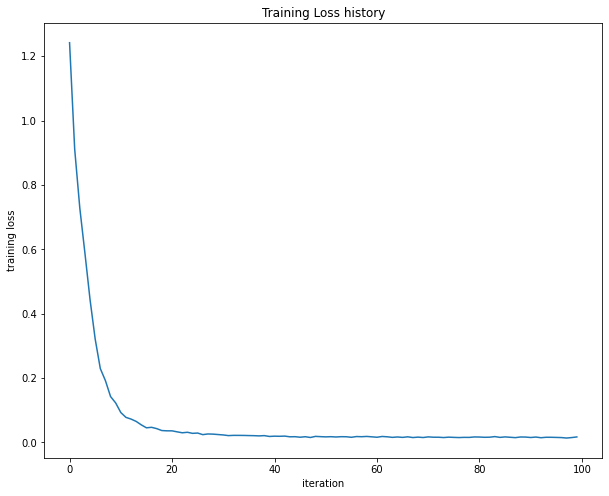

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

---

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

---

In [7]:
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [8]:
n_train = 49000
n_val = 1000
n_test = 9000

new_X_train = X_train[range(n_train)]
new_y_train = y_train[range(n_train)]

new_X_val = X_train[range(n_train, n_train + n_val)]
new_y_val = y_train[range(n_train, n_train + n_val)]

new_X_test = X_test[range(n_test)]
new_y_test = y_test[range(n_test)]

new_X_dev = X_test[range(n_test, n_test + n_val)]
new_y_dev = y_test[range(n_test, n_test + n_val)]

In [9]:
new_X_train = np.reshape(new_X_train, (new_X_train.shape[0], -1), ).astype(np.float64)
new_y_train = np.reshape(new_y_train, (new_y_train.shape[0],))

new_X_val = np.reshape(new_X_val, (new_X_val.shape[0], -1)).astype(np.float64)
new_y_val = np.reshape(new_y_val, (new_y_val.shape[0],))

new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], -1)).astype(np.float64)
new_y_test = np.reshape(new_y_test, (new_y_test.shape[0],))

new_X_dev = np.reshape(new_X_dev, (new_X_dev.shape[0], -1)).astype(np.float64)
new_y_dev = np.reshape(new_y_dev, (new_y_dev.shape[0],))

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes) 

stats = net.train(new_X_train, new_y_train, new_X_val, new_y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(new_X_val) == new_y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302774
iteration 100 / 1000: loss 2.300636
iteration 200 / 1000: loss 2.255748
iteration 300 / 1000: loss 2.120721
iteration 400 / 1000: loss 2.091629
iteration 500 / 1000: loss 2.029904
iteration 600 / 1000: loss 2.033015
iteration 700 / 1000: loss 1.922706
iteration 800 / 1000: loss 1.951045
iteration 900 / 1000: loss 1.895186
Validation accuracy:  0.31


---

Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

---

In [12]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

params = {
    'input_size': [32*32*3],
    'hidden_size': [50, 60],
    'num_classes': [10],
    'num_iters': [1500, 2000],
    'batch_size': [150, 200, 300],
    'learning_rate': [1e-1, 1e-2, 1e-3],
    'learning_rate_decay': [0.95],
    'reg': [0, 0.10]
}

df_scores = pd.DataFrame(columns=list(params.keys()) + 
                         ['accuracy'])

stats_arr = []

nets_arr = []

index = 0
for param_set in tqdm(ParameterGrid(params)):

    net = TwoLayerNet(param_set['input_size'], 
                      param_set['hidden_size'], 
                      param_set['num_classes']) 
    
    stats = net.train(new_X_train, new_y_train, new_X_val, new_y_val,
              num_iters=param_set['num_iters'], 
              batch_size=param_set['batch_size'],
              learning_rate=param_set['learning_rate'], 
              learning_rate_decay=param_set['learning_rate_decay'],
              reg=param_set['reg'], verbose=False)
    
    y_val_pred = net.predict(new_X_val)
    acc = np.mean(new_y_val == y_val_pred)

    stats_arr.append(stats)
    nets_arr.append(net)


    df_scores.loc[index] = [param_set['input_size'], param_set['hidden_size'], 
                            param_set['num_classes'], param_set['num_iters'], 
                            param_set['batch_size'], param_set['learning_rate'], 
                            param_set['learning_rate_decay'], param_set['reg'], acc]

    index += 1


100%|██████████| 72/72 [28:12<00:00, 23.50s/it]


*Отсортированная таблица*

In [13]:
df_scores.sort_values(by='accuracy', ascending=False, inplace=True)
df_scores

,input_size,hidden_size,num_classes,num_iters,batch_size,learning_rate,learning_rate_decay,reg,accuracy
46,3072.0,60.0,10.0,2000.0,200.0,0.001,0.95,0.0,0.383
71,3072.0,60.0,10.0,2000.0,300.0,0.001,0.95,0.1,0.367
70,3072.0,60.0,10.0,2000.0,300.0,0.001,0.95,0.0,0.349
44,3072.0,60.0,10.0,1500.0,200.0,0.001,0.95,0.0,0.340
34,3072.0,50.0,10.0,2000.0,200.0,0.001,0.95,0.0,0.337
...,...,...,...,...,...,...,...,...,...
17,3072.0,60.0,10.0,1500.0,150.0,0.010,0.95,0.1,0.078
66,3072.0,60.0,10.0,2000.0,300.0,0.010,0.95,0.0,0.078
54,3072.0,50.0,10.0,2000.0,300.0,0.010,0.95,0.0,0.078
53,3072.0,50.0,10.0,1500.0,300.0,0.010,0.95,0.1,0.078


In [14]:
best_id = df_scores.index[0]
best_stats = stats_arr[best_id]
best_net = nets_arr[best_id]
best_params = list(ParameterGrid(params))[best_id]

*Индекс строки с лучшими показателями* 

In [15]:
best_id

46

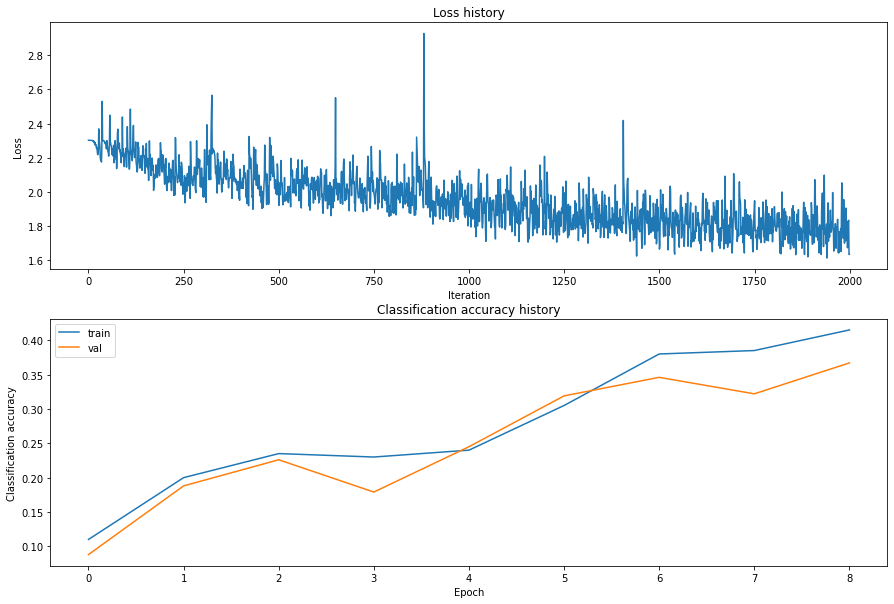

In [16]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

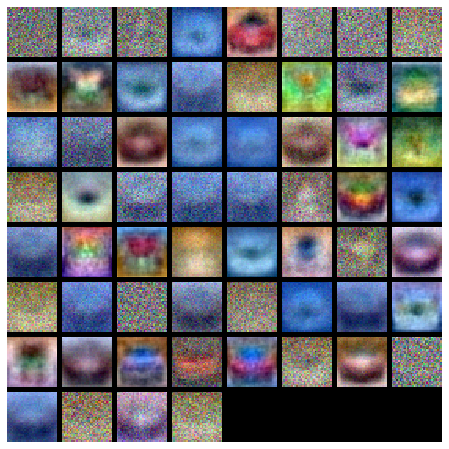

In [17]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(best_net)

*Лучшие гиперпараметры*

In [18]:
best_params

{'batch_size': 200,
 'hidden_size': 60,
 'input_size': 3072,
 'learning_rate': 0.001,
 'learning_rate_decay': 0.95,
 'num_classes': 10,
 'num_iters': 2000,
 'reg': 0}

*Лучшее значение accuracy*

In [19]:
print(f"Test accuracy: {(best_net.predict(new_X_test) == new_y_test).mean()}")

Test accuracy: 0.3691111111111111


***Сделайте выводы по результатам работы:***

Согласно результатам обучения при увеличении количества эпох в обучении увеличивается accuracy на валидационной выборке.